# Value, Value per sqm, and Neighborhood Analysis of Real Flats for Sale in Barcelona

Throughout this notebook, we will conduct a study of the flats that we extracted in *1.scrapping_request.ipynb* and that we also used to train the flat prices predictor in *2.flat_prices_predictor.ipynb*.

In [3]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, HTML

from utils2 import get_data

pd.set_option('display.max_columns', None)

In [4]:
# data pre-processing in utils.py
df = get_data()

IQR: 5530 | Actual: 5979 | 92.49%
IQR: 5725 | Actual: 5979 | 95.75%
Total different flats:  (3923, 93)


The study will have a strong focus on the district (level7) and the neighborhood (level8).

In the following tables, we show the average price and the average price per square meter by district and neighborhood.

As we can see, in terms of value per sqm, the most expensive districts are Eixample, Sarrià - Sant Gervasi and Les Corts.

And the most expensive Neighborhoods are Diagonal Mar i el Front Marítim del Poblenou (Sant Martí district), Sarrià (Sarrià - Sant Gervasi) and Dreta de l'Eixample (Eixample).

In [11]:
stat = df.groupby('level7')['value'].agg(['mean', 'count', 'sum']).rename(columns={"sum":"value_sum","mean":"value_mean"})
stat_value = df.groupby('level7')['surface'].agg(['sum','mean']).rename(columns={"sum":"sqm_sum", "mean":"sqm_mean"})
stat_sqm = pd.merge(stat, stat_value, on='level7')
stat_sqm["value_per_sqm"] = stat_sqm["value_sum"] / stat_sqm["sqm_sum"]
stat_sqm.sort_values("value_per_sqm", ascending=False)

value_mean  count  value_sum  sqm_sum    sqm_mean  \
level7                                                                        
Eixample               675240.975504    694  468617237    78749  113.471182   
Les Corts              681228.350746    134   91284599    15994  119.358209   
Sarrià - Sant Gervasi  839526.946108    334  280402000    50694  151.778443   
Sant Martí             519331.923611    288  149567594    28067   97.454861   
Ciutat Vella           458779.647750    511  234436400    45135   88.326810   
Gràcia                 560441.906250    224  125538987    24792  110.678571   
Sants - Montjuïc       343017.933333    240   82324304    19450   81.041667   
Horta - Guinardó       372250.350877    228   84873080    21494   94.271930   
Sant Andreu            358078.857988    169   60515327    15784   93.396450   
Nou Barris             233315.185629    167   38963636    14027   83.994012   

                       value_per_sqm  
level7                                
Eixample                 5950.770638  
Les Corts                5707.427723  
Sarrià - Sant Gervasi    5531.266028  
Sant Martí               5328.948374  
Ciutat Vella             5194.115431  
Gràcia                   5063.689376  
Sants - Montjuïc         4232.612031  
Horta - Guinardó         3948.687075  
Sant Andreu              3833.966485  
Nou Barris               2777.759749

In [12]:
stat = df.groupby(['level8','level7'])['value'].agg(['mean', 'count', 'sum']).rename(columns={"sum":"value_sum","mean":"value_mean"})
stat_value = df.groupby(['level8','level7'])['surface'].agg(['sum','mean']).rename(columns={"sum":"sqm_sum", "mean":"sqm_mean"})
stat_sqm = pd.merge(stat, stat_value, on=['level8','level7'])
stat_sqm["value_per_sqm"] = stat_sqm["value_sum"] / stat_sqm["sqm_sum"]
stat_sqm.sort_values("value_per_sqm", ascending=False).head(5)


value_mean  \
level8                                       level7                                 
Diagonal Mar i el Front Marítim del Poblenou Sant Martí             832648.571429   
Sarrià                                       Sarrià - Sant Gervasi  823973.684211   
Dreta de l'Eixample                          Eixample               870057.460317   
La Clota                                     Horta - Guinardó       497000.000000   
L'Antiga Esquerra de l'Eixample              Eixample               733632.771429   

                                                                    count  \
level8                                       level7                         
Diagonal Mar i el Front Marítim del Poblenou Sant Martí                70   
Sarrià                                       Sarrià - Sant Gervasi     38   
Dreta de l'Eixample                          Eixample                 189   
La Clota                                     Horta - Guinardó           7   
L'Antiga Esquerra de l'Eixample              Eixample                 140   

                                                                    value_sum  \
level8                                       level7                             
Diagonal Mar i el Front Marítim del Poblenou Sant Martí              58285400   
Sarrià                                       Sarrià - Sant Gervasi   31311000   
Dreta de l'Eixample                          Eixample               164440860   
La Clota                                     Horta - Guinardó         3479000   
L'Antiga Esquerra de l'Eixample              Eixample               102708588   

                                                                    sqm_sum  \
level8                                       level7                           
Diagonal Mar i el Front Marítim del Poblenou Sant Martí                8120   
Sarrià                                       Sarrià - Sant Gervasi     4469   
Dreta de l'Eixample                          Eixample                 24578   
La Clota                                     Horta - Guinardó           537   
L'Antiga Esquerra de l'Eixample              Eixample                 16168   

                                                                      sqm_mean  \
level8                                       level7                              
Diagonal Mar i el Front Marítim del Poblenou Sant Martí             116.000000   
Sarrià                                       Sarrià - Sant Gervasi  117.605263   
Dreta de l'Eixample                          Eixample               130.042328   
La Clota                                     Horta - Guinardó        76.714286   
L'Antiga Esquerra de l'Eixample              Eixample               115.485714   

                                                                    value_per_sqm  
level8                                       level7                                
Diagonal Mar i el Front Marítim del Poblenou Sant Martí               7178.004926  
Sarrià                                       Sarrià - Sant Gervasi    7006.265384  
Dreta de l'Eixample                          Eixample                 6690.571243  
La Clota                                     Horta - Guinardó         6478.584730  
L'Antiga Esquerra de l'Eixample              Eixample                 6352.584612

If we plot the price per square meter against the total price, we observe that it increases linearly up to a certain point, where it levels off and even shows a downward trend, whether we look at individual apartments or aggregate data by neighborhood.

In other words, the larger the apartment you buy, the the value per sqm will grow but up to a certain point.

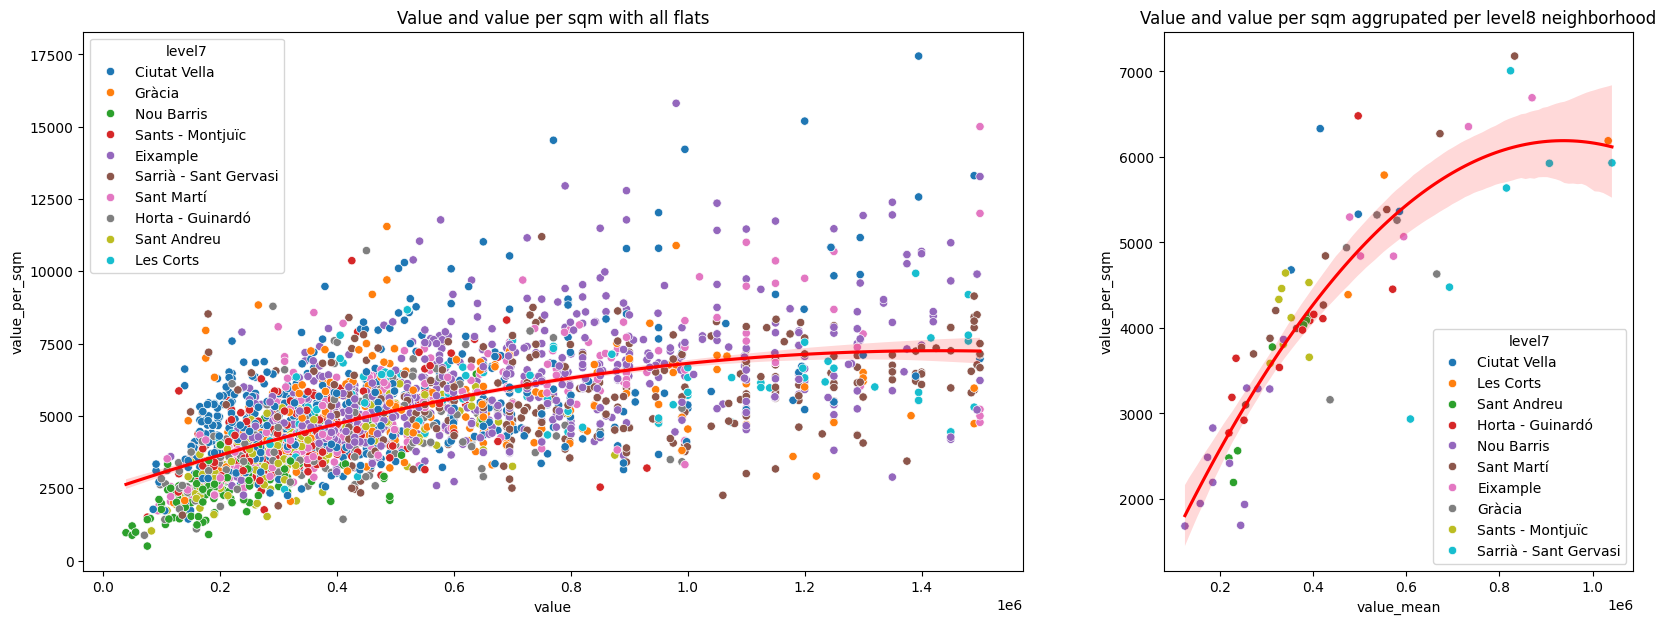

In [13]:
df["value_per_sqm"] = df["value"] / df["surface"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), gridspec_kw={'width_ratios': [2, 1]})
sns.scatterplot(data=df, x="value", y="value_per_sqm", hue="level7", ax=ax[0])
sns.regplot(data=df, x='value', y='value_per_sqm', scatter=False, color='red', order=2, label='Trendline', ax=ax[0])
ax[0].set_title("Value and value per sqm with all flats")

sns.scatterplot(data=stat_sqm, x="value_mean", y="value_per_sqm", hue="level7", ax=ax[1])
sns.regplot(data=stat_sqm, x='value_mean', y='value_per_sqm', scatter=False, color='red', order=2, label='Trendline', ax=ax[1])
ax[1].set_title("Value and value per sqm aggrupated per level8 neighborhood")
plt.show()

This gives us the idea of calculating **how fair it is to buy an apartment in each case**. For instance, if the general average is €200,000 for a 75 sqm apartment, then it would be fair for a 150 sqm apartment to cost €400,000. In other words, if the price of the apartment doubles, it should have double the square meters. As we've seen before, this isn't always the case. Therefore, **we'll calculate a "fairness" value—or the opposite, "unfairness"—to rank the neighborhoods where it's more worthwhile to buy an apartment**.

In [14]:
# Calculating the deviation from general mean
value_general_mean = np.mean(df.value)
surface_general_mean = np.mean(df.surface)
stat_sqm["dev_value_general"] = stat_sqm["value_mean"] / value_general_mean
stat_sqm["dev_surface_general"] = stat_sqm["sqm_mean"] / surface_general_mean
stat_sqm["diff_ratios_unfairness"] = stat_sqm["dev_value_general"] / stat_sqm["dev_surface_general"]
stat_sqm = stat_sqm.sort_values("diff_ratios_unfairness", ascending=False)
stat_sqm[["value_mean","sqm_mean","value_per_sqm","dev_value_general","dev_surface_general", "diff_ratios_unfairness"]].head()


value_mean  \
level8                                       level7                                 
Diagonal Mar i el Front Marítim del Poblenou Sant Martí             832648.571429   
Sarrià                                       Sarrià - Sant Gervasi  823973.684211   
Dreta de l'Eixample                          Eixample               870057.460317   
La Clota                                     Horta - Guinardó       497000.000000   
L'Antiga Esquerra de l'Eixample              Eixample               733632.771429   

                                                                      sqm_mean  \
level8                                       level7                              
Diagonal Mar i el Front Marítim del Poblenou Sant Martí             116.000000   
Sarrià                                       Sarrià - Sant Gervasi  117.605263   
Dreta de l'Eixample                          Eixample               130.042328   
La Clota                                     Horta - Guinardó        76.714286   
L'Antiga Esquerra de l'Eixample              Eixample               115.485714   

                                                                    value_per_sqm  \
level8                                       level7                                 
Diagonal Mar i el Front Marítim del Poblenou Sant Martí               7178.004926   
Sarrià                                       Sarrià - Sant Gervasi    7006.265384   
Dreta de l'Eixample                          Eixample                 6690.571243   
La Clota                                     Horta - Guinardó         6478.584730   
L'Antiga Esquerra de l'Eixample              Eixample                 6352.584612   

                                                                    dev_value_general  \
level8                                       level7                                     
Diagonal Mar i el Front Marítim del Poblenou Sant Martí                      1.539592   
Sarrià                                       Sarrià - Sant Gervasi           1.523552   
Dreta de l'Eixample                          Eixample                        1.608762   
La Clota                                     Horta - Guinardó                0.918968   
L'Antiga Esquerra de l'Eixample              Eixample                        1.356509   

                                                                    dev_surface_general  \
level8                                       level7                                       
Diagonal Mar i el Front Marítim del Poblenou Sant Martí                        1.103563   
Sarrià                                       Sarrià - Sant Gervasi             1.118834   
Dreta de l'Eixample                          Eixample                          1.237154   
La Clota                                     Horta - Guinardó                  0.729819   
L'Antiga Esquerra de l'Eixample              Eixample                          1.098670   

                                                                    diff_ratios_unfairness  
level8                                       level7                                         
Diagonal Mar i el Front Marítim del Poblenou Sant Martí                           1.395111  
Sarrià                                       Sarrià - Sant Gervasi                1.361731  
Dreta de l'Eixample                          Eixample                             1.300373  
La Clota                                     Horta - Guinardó                     1.259172  
L'Antiga Esquerra de l'Eixample              Eixample                             1.234683

The further to the left a neighborhood is, the less fair it is to buy an apartment in terms of price growth relative to the growth in square meters compared to the average.

In the second graph, where the average price is shown, we see that the more expensive the neighborhood, the less fair the price-to-square-meter ratio becomes. However, there are some interesting examples. For instance, if you can afford an apartment in "El Putxet" (which is an expensive neighborhood), it will be much more cost-effective compared to neighborhoods like Barceloneta, Hostafrancs, or Poblenou, which are initially considered cheaper.

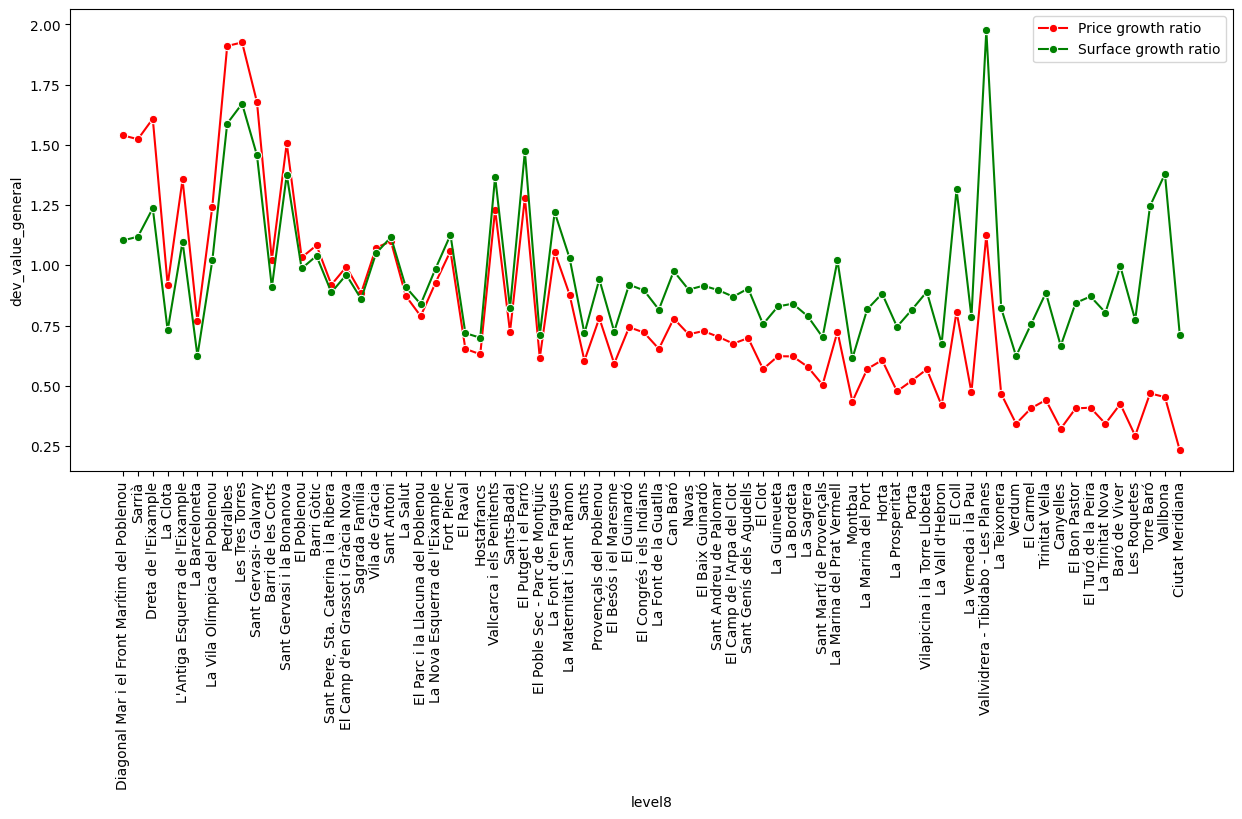

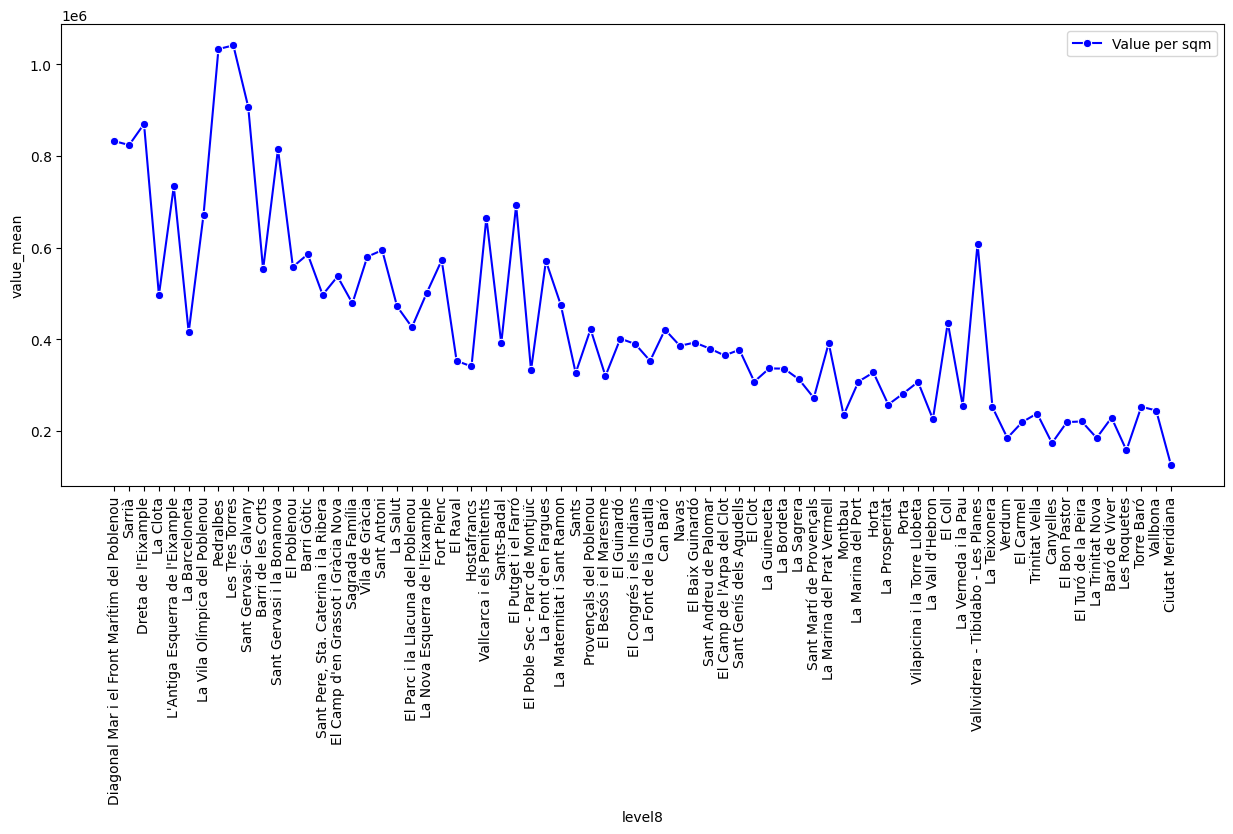

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=stat_sqm, x="level8", y="dev_value_general", marker='o', label="Price growth ratio", color="red")
sns.lineplot(data=stat_sqm, x="level8", y="dev_surface_general", marker='o', label="Surface growth ratio", color="green")
plt.legend()
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=stat_sqm, x="level8", y="value_mean", marker='o', label="Value per sqm", color="blue")
plt.legend()
plt.xticks(rotation=90)
plt.show()

From this point, I have plotted various maps that represent the previously calculated information in a more graphical and interpretable manner:

1. Each apartment and its price are visualized when you click on the point. The color scale ranges from red (more expensive) to green (cheaper).

2. The average price per neighborhood is visualized.

3. The average price per square meter per neighborhood is visualized.

4. The unfairness ratio, as previously explained in the notebook, is visualized.

*If the maps are not displayed, you can find them in the readme of the repository.*

In [16]:
import folium
import branca.colormap as cm

# Find the min and max values of 'value' in your DataFrame
min_value = df['value'].min()
max_value = df['value'].max()

# Create a map centered around Barcelona
m = folium.Map(location=[41.3851, 2.1734], zoom_start=13, tiles='cartodbpositron')
colormap = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_value, vmax=max_value)

# Add CircleMarkers for each location with color based on NumericalFeature
for index, row in df.iterrows():
    fill_color = colormap(row['value'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # Adjust the radius of the circle marker
        popup=f"{row['value']}€",
        fill=True,
        fill_color=fill_color,
        color=None,
        fill_opacity=0.7
    ).add_to(m)

colormap.caption = 'Value'
m.add_child(colormap)

display(m)

In [17]:
import requests
import ast
import geopandas as gpd

# getting the geometrical data of Barcelona Neighbourhoods in GeoDataFrame format
url = "https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search?resource_id=b21fa550-56ea-4f4c-9adc-b8009381896e"
response = requests.get(url)
data = response.json()
records = data["result"]["records"]
hoods = pd.DataFrame(records)
hoods['geometry'] = gpd.GeoSeries.from_wkt(hoods['geometria_wgs84'])
my_geo_df = gpd.GeoDataFrame(hoods, geometry='geometry', crs="EPSG:4326")


In [18]:
from fuzzywuzzy import process

def merge_geodf_with_data(geo_df, column_geodf, data, column_data):
    unique_values_df1 = geo_df[column_geodf].unique()
    unique_values_df2 = data[column_data].unique()

    matches = {}
    for value in unique_values_df1:
        matches[value] = process.extractOne(value, unique_values_df2)[0] #find_most_similar(value, unique_values_df2)
    
    matches_df = pd.DataFrame(matches.items(), columns=[column_geodf, column_data])
    
    my_geo_df_names = pd.merge(geo_df, matches_df, on=column_geodf)
    merged = pd.merge(my_geo_df_names, data, on=column_data)

    return merged

# merging the GeoDataFrame with our data by Neighbourhood name
value_hood = merge_geodf_with_data(my_geo_df, "nom_barri", stat_sqm.reset_index()[["level8","value_mean"]], "level8")
value_per_sqm_hood = merge_geodf_with_data(my_geo_df, "nom_barri", stat_sqm.reset_index()[["level8","value_per_sqm","diff_ratios_unfairness"]], "level8")


In [19]:
import folium
from IPython.display import display

# minimum and maximum values to set the colormap range
min_value = value_hood['value_mean'].min()
max_value = value_hood['value_mean'].max()

# create our map and colormap to plot
m = folium.Map([41.3851, 2.1734], zoom_start=12, tiles="cartodbpositron")
colormap = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_value, vmax=max_value)

# going through all neighbourhoods and adding the geometrical and statistical information to the map
for index, row in value_hood.iterrows():
    color = colormap(row["value_mean"])
    polygon = folium.GeoJson(row["geometry"],
                              style_function=lambda x, color=color: {'fillColor': color, 'color': color, 'weight': 1, 'fillOpacity': 0.7})
    polygon.add_child(folium.Popup(f'{row["level8"]} - {row["value_mean"]:.1f}€'))
    m.add_child(polygon)

    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        icon=folium.DivIcon(html=f'<div style="font-size: 6pt; color: black;">{row["value_mean"]:.1f}€</div>')
    ).add_to(m)

colormap.caption = 'Average Value'
m.add_child(colormap)

display(m)

In [72]:
# minimum and maximum values to set the colormap range
min_value = value_per_sqm_hood['value_per_sqm'].min()
max_value = value_per_sqm_hood['value_per_sqm'].max()

# create our map and colormap to plot
m = folium.Map([41.3851, 2.1734], zoom_start=12, tiles="cartodbpositron")
colormap = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_value, vmax=max_value)

# going through all neighbourhoods and adding the geometrical and statistical information to the map
for index, row in value_per_sqm_hood.iterrows():
    color = colormap(row["value_per_sqm"])
    polygon = folium.GeoJson(row["geometry"],
                              style_function=lambda x, color=color: {'fillColor': color, 'color': color, 'weight': 1, 'fillOpacity': 0.7})
    polygon.add_child(folium.Popup(f'{row["level8"]} - {row["value_per_sqm"]:.1f}€'))

    m.add_child(polygon)

    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        icon=folium.DivIcon(html=f'<div style="font-size: 6pt; color: black;">{row["value_per_sqm"]:.1f}€</div>')
    ).add_to(m)

colormap.caption = 'Value per sqm'
m.add_child(colormap)

display(m)

In [32]:
# minimum and maximum values to set the colormap range
min_value = value_per_sqm_hood['diff_ratios_unfairness'].min()
max_value = value_per_sqm_hood['diff_ratios_unfairness'].max()

# create our map and colormap to plot
m = folium.Map([41.3851, 2.1734], zoom_start=12, tiles="cartodbpositron")
colormap = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_value, vmax=max_value)

# going through all neighbourhoods and adding the geometrical and statistical information to the map
for index, row in value_per_sqm_hood.iterrows():
    color = colormap(row["diff_ratios_unfairness"])
    polygon = folium.GeoJson(row["geometry"],
                              style_function=lambda x, color=color: {'fillColor': color, 'color': color, 'weight': 1, 'fillOpacity': 0.7})
    polygon.add_child(folium.Popup(row["level8"]))

    m.add_child(polygon)
colormap.caption = 'Unfairness'
m.add_child(colormap)
